In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [53]:
class_names = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Human-Emotion-Detection/dataset/train', 
                                                    batch_size = 32, target_size = (64,64), class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Human-Emotion-Detection/dataset/test', 
                                                   batch_size = 32, target_size = (64,64), class_mode = 'categorical')



Found 92968 images belonging to 7 classes.
Found 17356 images belonging to 7 classes.


In [7]:
test_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [8]:
# Creating the Image Classifier CNN Model
cnn = tf.keras.models.Sequential()

#Convolution and Max Pooling layer 1
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution and Max Pooling layer 2
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution and Max Pooling layer 3
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Converting the multi-dimension image data array to 1d array
cnn.add(tf.keras.layers.Flatten())

#Fully Connected layer 1
cnn.add(tf.keras.layers.Dense(128, activation='relu'))

#Fully Connected layer 2
cnn.add(tf.keras.layers.Dense(64, activation='relu'))

#output layer -> 7 Neurons for 7 different classes
#activation function used for multiclass classification is softmax, for binary use sigmoid as activation fxn
cnn.add(tf.keras.layers.Dense(7, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
# Defining the optimizer and loss function
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
#Training the CNN Model
cnn.fit(x=train_generator, validation_data=test_generator, epochs=30)

Epoch 1/30
2906/2906 [==============================] - 317s 109ms/step - loss: 1.3202 - acc: 0.5217 - val_loss: 1.3649 - val_acc: 0.4818
Epoch 2/30
2906/2906 [==============================] - 330s 114ms/step - loss: 1.2138 - acc: 0.5644 - val_loss: 1.3245 - val_acc: 0.5051
Epoch 3/30
2906/2906 [==============================] - 390s 134ms/step - loss: 1.1517 - acc: 0.5861 - val_loss: 1.3582 - val_acc: 0.5049
Epoch 4/30
2906/2906 [==============================] - 356s 122ms/step - loss: 1.1176 - acc: 0.6002 - val_loss: 1.3798 - val_acc: 0.4997
Epoch 5/30
2906/2906 [==============================] - 372s 128ms/step - loss: 1.0945 - acc: 0.6086 - val_loss: 1.2693 - val_acc: 0.5249
Epoch 6/30
2906/2906 [==============================] - 383s 132ms/step - loss: 1.0759 - acc: 0.6167 - val_loss: 1.2893 - val_acc: 0.5302
Epoch 7/30
2906/2906 [==============================] - 337s 116ms/step - loss: 1.0613 - acc: 0.6207 - val_loss: 1.2970 - val_acc: 0.5237
Epoch 8/30
2906/2906 [============

In [70]:
# Using the Model to make Predictions
def predictEmotion(filepath):
    
    img1 = image.load_img(filepath, target_size = (64,64))
    
    plt.imshow(img1)
    
    Y = image.img_to_array(img1, dtype=int)
    X = np.expand_dims(Y, axis=0)
    
    result = cnn.predict(X)
    index = np.argmax(result)
    
    #print(index)
    
    print("Predicted Emotion: ", class_names[index])
        

In [71]:
# Making Predictions of random images

Predicted Emotion:  Surprise


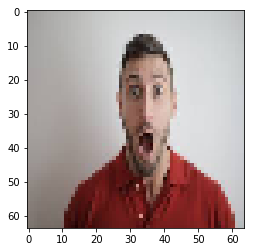

In [141]:
predictEmotion(r"/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Human-Emotion-Detection/prediction_images/14.jpg")